<a href="https://colab.research.google.com/github/walkerjian/Physics/blob/main/Differential_Algebraic_Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Differential-Algebraic Equations (DAEs)**

**Differential-algebraic equations (DAEs)** are systems of equations that consist of both differential and algebraic components. They generalize ordinary differential equations (ODEs) by allowing constraints that do not involve derivatives, resulting in a more complex interplay between dynamics and constraints.

DAEs arise naturally in many areas, such as control systems, electrical circuit simulation, robotics, chemical engineering, and fluid dynamics. Unlike ODEs, DAEs often include implicit relationships between variables, making their analysis and numerical solution more challenging.

## 1. **What Are DAEs?**

A DAE can be written in the general form:

$$
F(t, y(t), \dot{y}(t)) = 0,
$$

where:
- $ y(t) $ is the state vector (dependent variables),
- $ \dot{y}(t) $ represents the time derivatives of $ y(t) $,
- $ t $ is the independent variable (usually time),
- $ F $ is a function representing the system dynamics and constraints.

The key distinction between DAEs and ODEs is the presence of algebraic constraints, which often involve $ y(t) $ but not $ \dot{y}(t) $.

---

## 2. **Index of a DAE**

The **index** of a DAE measures its "difficulty" by quantifying the number of times algebraic constraints must be differentiated to reduce the system to an equivalent ODE form. Common types include:
- **Index-1 DAEs**: Constraints can be resolved directly for the algebraic variables.
- **Index-2 and higher DAEs**: Require differentiation of constraints to reduce them to an index-1 or ODE form.

For example:
- Consider the pendulum equations in Cartesian coordinates:
  $$
  \dot{x} = v_x, \quad \dot{y} = v_y, \quad m \dot{v}_x = -\lambda x, \quad m \dot{v}_y = -mg - \lambda y,
  $$
  with the algebraic constraint:
  $$
  x^2 + y^2 - l^2 = 0.
  $$

---

## 3. **Applications of DAEs**

1. **Electrical Circuits**: DAEs naturally describe circuits via Kirchhoff's laws, combining dynamic components (capacitors and inductors) with algebraic constraints (voltage and current relationships).
   
2. **Mechanical Systems**: Multibody systems with constraints (e.g., robotic arms or pendulums) are modeled as DAEs.

3. **Chemical Engineering**: Reaction kinetics combined with conservation laws often lead to DAEs.

4. **Optimal Control**: Problems where control variables are constrained often result in DAEs.

---

## 4. **Numerical Methods for Solving DAEs**

Numerical solution of DAEs is more involved than solving ODEs. Popular approaches include:

1. **Reduction to ODEs**: For index-1 systems, algebraic constraints are solved explicitly (if possible).

2. **Implicit Methods**: Methods such as the backward differentiation formula (BDF) are widely used for stiff DAEs.

3. **Differentiation-Based Methods**: Higher-index DAEs often require differentiating constraints to reduce the index.

4. **Stabilization Techniques**: For index-2 or higher, stabilization methods like projection or penalty techniques may be used.

---

## 5. **Exercises and Examples**

### Example 1: Solving an Index-1 DAE

Consider the system:
$$
\begin{aligned}
\dot{x} &= -y, \\
x^2 + y^2 &= 1.
\end{aligned}
$$

Here, the algebraic constraint $ x^2 + y^2 = 1 $ defines a unit circle.

- **Task**: Solve this system numerically using Python.
- **Steps**:
  1. Reformulate the system using Lagrange multipliers or implicit solvers.
  2. Use `scipy.integrate.solve_ivp` with the Radau method for stiff systems.
---


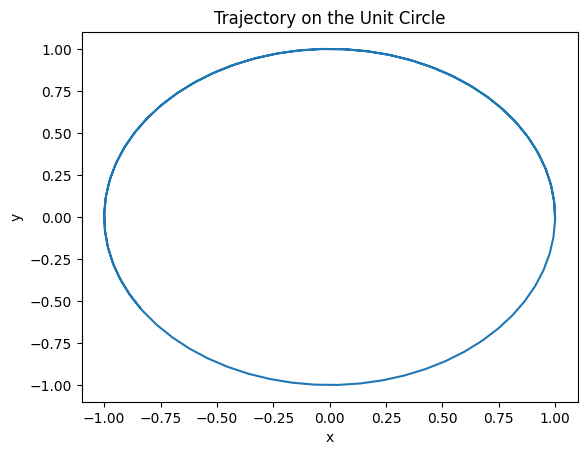

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

# Define the DAE system
def dae_system(t, z):
    x, y, lambda_ = z
    dxdt = -y
    dydt = x
    constraint = x**2 + y**2 - 1
    return [dxdt, dydt, constraint]

# Initial conditions
z0 = [1.0, 0.0, 0.0]  # x, y, lambda
t_span = (0, 10)
t_eval = np.linspace(*t_span, 100)

# Solve the system
solution = solve_ivp(dae_system, t_span, z0, method='Radau', t_eval=t_eval)

# Plot the solution
import matplotlib.pyplot as plt
plt.plot(solution.y[0], solution.y[1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectory on the Unit Circle")
plt.show()



### Example 2: A Simple Electrical Circuit

Simulate an RLC circuit described by the DAE:
$$
\begin{aligned}
V - RI - L\dot{I} - Q/C &= 0, \\
\dot{Q} - I &= 0.
\end{aligned}
$$

- **Task**: Solve numerically with given initial conditions.
- **Steps**: Implement the equations in Python, solving with `solve_ivp`.

---

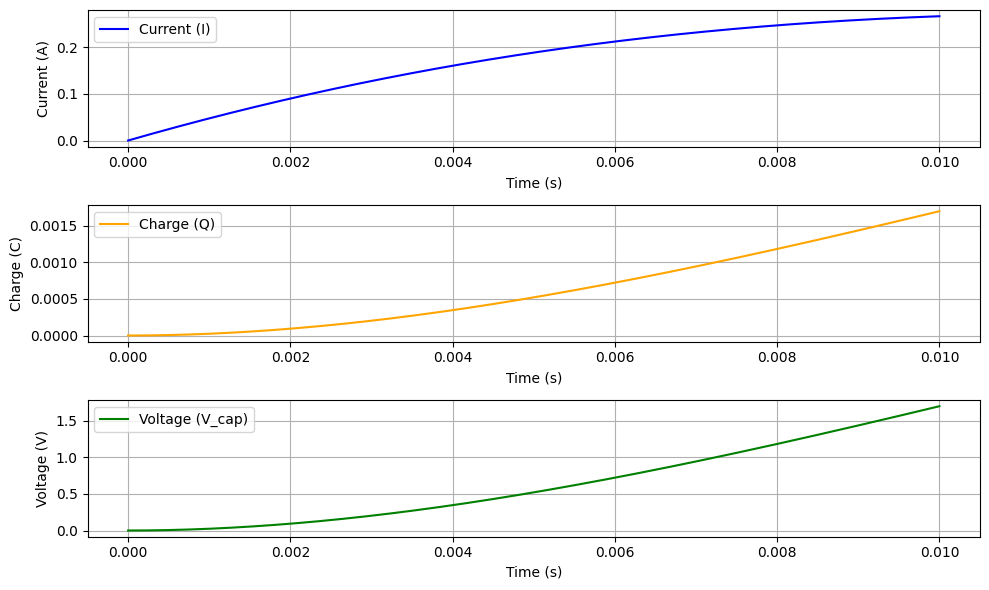

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters for the RLC circuit
R = 10  # Resistance (Ohms)
L = 0.1  # Inductance (Henries)
C = 0.001  # Capacitance (Farads)
V = 5  # Voltage source (Volts)

# Define the DAE system
def rlc_dae(t, z):
    Q, I = z  # Q: charge on the capacitor, I: current through the circuit
    dQdt = I
    dIdt = (V - R * I - Q / C) / L  # Derived from Kirchhoff's voltage law
    return [dQdt, dIdt]

# Initial conditions
Q0 = 0  # Initial charge on the capacitor
I0 = 0  # Initial current
z0 = [Q0, I0]

# Time span for the simulation
t_span = (0, 0.01)  # Simulate for 10 milliseconds
t_eval = np.linspace(*t_span, 1000)  # 1000 time points for smooth plotting

# Solve the DAE system
solution = solve_ivp(rlc_dae, t_span, z0, method='Radau', t_eval=t_eval)

# Extract results
Q = solution.y[0]  # Charge on the capacitor
I = solution.y[1]  # Current in the circuit

# Calculate the voltage across the capacitor
V_cap = Q / C

# Plot the results
plt.figure(figsize=(10, 6))

# Plot current
plt.subplot(3, 1, 1)
plt.plot(solution.t, I, label='Current (I)', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.grid()
plt.legend()

# Plot charge
plt.subplot(3, 1, 2)
plt.plot(solution.t, Q, label='Charge (Q)', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Charge (C)')
plt.grid()
plt.legend()

# Plot capacitor voltage
plt.subplot(3, 1, 3)
plt.plot(solution.t, V_cap, label='Voltage (V_cap)', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


### Example 3: Pendulum System in Cartesian Coordinates

- Solve the pendulum equations numerically and visualize the motion in Cartesian coordinates. Add damping for a realistic scenario.
**WIP**
---

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Parameters for the pendulum
l = 1.0  # Length of the pendulum (m)
m = 1.0  # Mass of the pendulum (kg)
g = 9.81  # Gravitational acceleration (m/s^2)

# Define the DAE system for the pendulum
def pendulum_dae(t, z):
    x, y, vx, vy, lambda_ = z

    dxdt = vx
    dydt = vy
    dvxdt = -lambda_ * x / m
    dvydt = -g - lambda_ * y / m
    constraint = x**2 + y**2 - l**2

    return [dxdt, dydt, dvxdt, dvydt, constraint]

# Initial conditions
x0, y0 = 1.0, 0.0  # Start at the end of the pendulum
vx0, vy0 = 0.0, 0.0  # No initial velocity
lambda0 = 0.0  # Initial Lagrange multiplier
z0 = [x0, y0, vx0, vy0, lambda0]

# Time span for the simulation
t_span = (0, 10)
t_eval = np.linspace(*t_span, 500)

# Solve the DAE system
def solve_pendulum(length, gravity):
    global l, g
    l = length
    g = gravity
    solution = solve_ivp(pendulum_dae, t_span, z0, method='Radau', t_eval=t_eval)
    x = solution.y[0]
    y = solution.y[1]
    return x, y, solution.t

# Interactive plot with sliders
def plot_pendulum(length=1.0, gravity=9.81):
    x, y, t = solve_pendulum(length, gravity)

    plt.figure(figsize=(6, 6))
    plt.plot(x, y, label="Pendulum Trajectory")
    plt.scatter([0], [0], color='red', label="Pivot Point")
    plt.xlabel("x (m)")
    plt.ylabel("y (m)")
    plt.title(f"Pendulum Trajectory (Length={length}m, Gravity={gravity}m/s^2)")
    plt.grid()
    plt.legend()
    plt.axis('equal')
    plt.show()

# Create sliders to control parameters
interact(plot_pendulum,
         length=FloatSlider(value=1.0, min=0.5, max=2.0, step=0.1, description="Length (m)"),
         gravity=FloatSlider(value=9.81, min=1.0, max=20.0, step=0.5, description="Gravity (m/s^2)"));


interactive(children=(FloatSlider(value=1.0, description='Length (m)', max=2.0, min=0.5), FloatSlider(value=9.…

## Next Steps

To explore DAEs further:
- Study specific numerical methods like **Gear's method** or **collocation methods**.
- Implement DAEs in Mathematica using `NDSolve` with constraints.
- Explore index-reduction techniques and their applications.

This framework should provide a strong foundation for further study, reinforced by hands-on computational exercises!